In [2]:
import sympy as sp 
from matplotlib import pyplot as plt
import numpy as np

#Oppgave 1, Likevekts og kvantumspris
x, p, t=sp.symbols('x p t', real=True, positive=True)
def supply(x, t):
    return ((100+x)/4.3) + t
def demand(x):
    return (500-x)/3.2

ligning=sp.Eq(demand(x),supply(x, t))

x_eq=sp.solve(ligning, x)
x_eq = x_eq[0]

likevekt_eq=demand(x_eq)
print(likevekt_eq, x_eq)

#Likevektsprisen blir 0.5733333*t+80
#Kvantumsprisen blir 244-1.834*t

0.573333333333333*t + 80.0 244.0 - 1.83466666666667*t


In [3]:
#Oppgave 2, Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.
produsent_O = sp.integrate(likevekt_eq-supply(x, t),(x,0,x_eq))
konsument_O = sp.integrate(demand(x)-likevekt_eq,(x,0,x_eq))
avgiftsproveny = sp.integrate(t, (x, 0, x_eq))


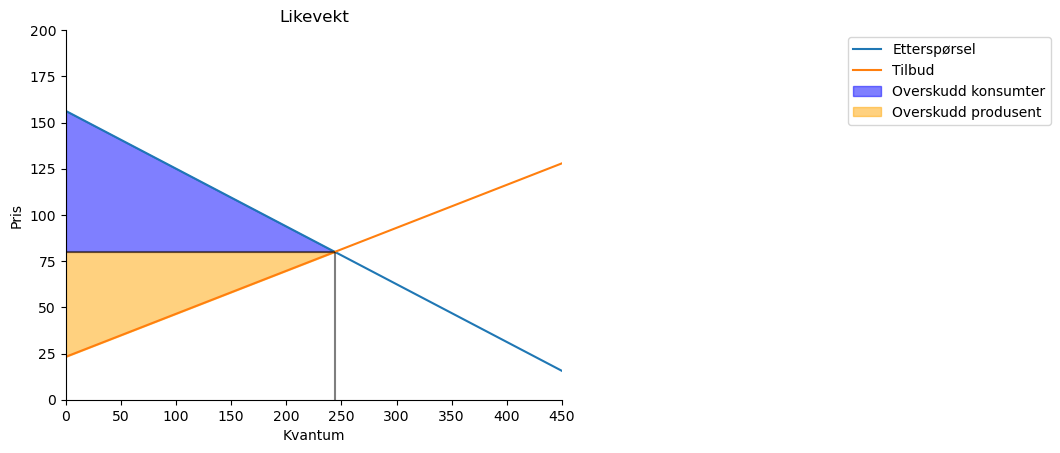

In [4]:
#Oppgave 3, tegn likevekt for t = 0, fargelegg KO og PO
x_num=np.linspace(0.1,450,100)

ligningt0 = sp.Eq(demand(x),supply(x, 0))
eq_t0 = sp.solve(ligningt0,x)
eq_t0 = float(eq_t0[0])
eq_t01=demand(eq_t0)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris', loc='center')
                ax.set_xlabel('Kvantum', loc='center')
                ax.set(xlim=(0,450))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()


ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud')
ax.set_title('Likevekt')

line = np.linspace(0,eq_t0,100)


ax.vlines(eq_t0,0,demand(eq_t0), color='black', alpha=0.5)
ax.hlines(eq_t01,0,eq_t0, color='black', alpha=0.5)
ax.fill_between(line,eq_t01,demand(line), color = "blue",alpha = 0.5,label='Overskudd konsumter')
ax.fill_between(line,supply(line, 0),eq_t01, color = "orange",alpha = 0.5,label='Overskudd produsent')
ax.legend(bbox_to_anchor=(2,1))

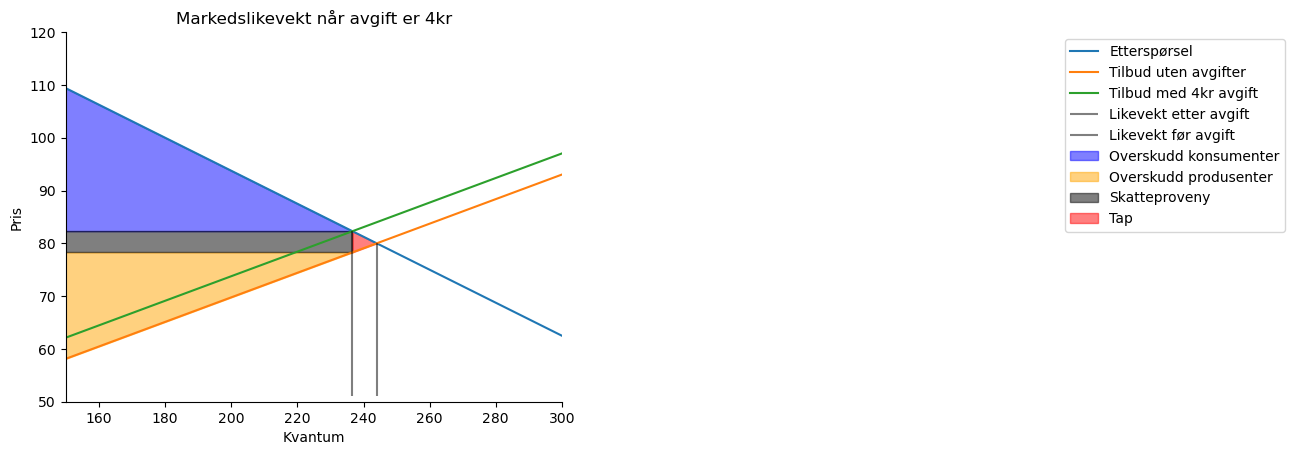

In [9]:
#Oppgave 4, tegn inn likevekt for t = 4, og fargelegg avgiftsprovny
x_num=np.linspace(0.1,450,100)
ligning_4 = sp.Eq(demand(x),supply(x, 4))

ligningt4 = sp.solve(ligning_4,x)
ligningt4 = float(ligningt4[0])
ligning_t4=demand(ligningt4)

def create_ax2():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris', loc='center')
                ax.set_xlabel('Kvantum', loc='center')
                ax.set(xlim=(150,300))
                ax.set(ylim=(50,120))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax2()
ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 0), label='Tilbud uten avgifter')
ax.plot(x_num, supply(x_num, 4), label='Tilbud med 4kr avgift')
ax.set_title('Markedslikevekt når avgift er 4kr')

line2 = np.linspace(0,ligningt4,100)
line3 = np.linspace(eq_t0,ligningt4,100)

ax.vlines(ligningt4,51,demand(ligningt4), color='black', alpha= 0.5, label='Likevekt etter avgift') 
ax.vlines(eq_t0,51,demand(eq_t0), color='black', alpha= 0.5, label='Likevekt før avgift')
ax.fill_between(line2,ligning_t4,demand(line2), color = "blue",alpha = 0.5,label='Overskudd konsumenter')
ax.fill_between(line2,supply(line2, 0),ligning_t4-4, color = "orange",alpha = 0.5,label='Overskudd produsenter')
ax.fill_between(line2,ligning_t4,ligning_t4-4, color = "black",alpha = 0.5,label='Skatteproveny')
ax.fill_between(line3,supply(line3, 0),demand(line3), color = "red",alpha = 0.5,label='Tap')

ax.legend(bbox_to_anchor=(2,1))

In [19]:
#Oppgave 5, Bruk de uttrykkene som du har laget for å fylle ut følgende tabell.

